In [1]:
import pandas as pd
import numpy as np

### reading the file

In [2]:
df=pd.read_csv("C:\\Users\\rajpu\\Downloads\\archive (2)\\spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### renaming of the columns

In [5]:
df.columns=['label','text']

In [6]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df.shape

(5572, 2)

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
viz=df['label'].value_counts()

### visualiasation of the text data

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

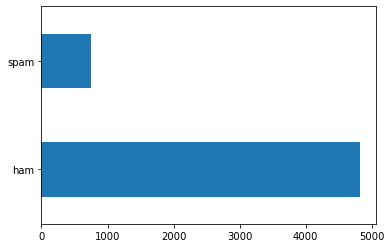

In [10]:
viz.plot(kind='barh')

## data preprocessing

In [17]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [18]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

### mapping spam and ham as 0 and 1

In [19]:
df.loc[df['label']=='spam','label',]=0
df.loc[df['label']=='ham','label',]=1

In [20]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [21]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: object

### splitting data into training and testing set

In [11]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: text, Length: 4457, dtype: object

In [24]:
y_train

1978    1
3989    0
3935    1
4078    1
4086    0
       ..
3772    1
5191    1
5226    1
5390    1
860     1
Name: label, Length: 4457, dtype: object

In [26]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [27]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


## Tfidf vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
feature_extraction=TfidfVectorizer(min_df=1, stop_words= 'english')

X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [35]:
print(X_train)

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: text, Length: 4457, dtype: object


In [36]:
print(X_train_features)

  (0, 4520)	0.4658046386365619
  (0, 3210)	0.348722265231364
  (0, 7415)	0.348722265231364
  (0, 1706)	0.3431839629173582
  (0, 4416)	0.4528381701109944
  (0, 1371)	0.4658046386365619
  (1, 0)	0.2654936554684193
  (1, 1649)	0.3059746053542906
  (1, 6440)	0.2953742837684993
  (1, 4533)	0.3059746053542906
  (1, 419)	0.28715203556385105
  (1, 4292)	0.2953742837684993
  (1, 5005)	0.1937920260229529
  (1, 2661)	0.3059746053542906
  (1, 1533)	0.2015782058421696
  (1, 6296)	0.269833648032668
  (1, 3631)	0.2804339696184593
  (1, 3140)	0.3059746053542906
  (1, 1187)	0.26161139982801973
  (2, 2190)	0.5102109014477275
  (2, 5351)	0.5102109014477275
  (2, 1674)	0.35156722029872034
  (2, 5770)	0.3962151014046925
  (2, 3061)	0.44585171875646595
  (3, 5484)	0.4829129976175997
  :	:
  (4451, 5740)	0.3358090891373877
  (4451, 4686)	0.3478605253385091
  (4452, 3402)	0.4536077050510107
  (4452, 3423)	0.4833413012939851
  (4452, 1579)	0.3576443319642905
  (4452, 1781)	0.3311324953642251
  (4452, 5998)	0.3

## importing LogisticRegression as classification model

In [39]:
from sklearn.linear_model import LogisticRegression

In [42]:
model= LogisticRegression()

### fitting and predicting model

In [43]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [51]:
prediction_train=model.predict(X_train_features)

In [46]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_train=accuracy_score(y_train,prediction_train)

In [61]:
print('accuracy on train data:',accuracy_train)

accuracy on train data: 0.9694862014808167


In [57]:
prediction_test=model.predict(X_test_features)

In [58]:
accuracy_test=accuracy_score(y_test,prediction_test)

In [60]:
print('accuracy on test data:',accuracy_test)

accuracy on test data: 0.9524663677130045


## trail with any given input mail

In [63]:
input=[""]

input_data_features=feature_extraction.transform(input)

In [65]:
prediction=model.predict(input_data_features)

In [66]:
input=['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']

input_data_features=feature_extraction.transform(input)

In [68]:
prediction=model.predict(input_data_features)
print(prediction)

[1]


In [69]:
if(prediction[0]==1):
    print('ham mail')
else:
    print('spam')

ham mail


## testing with input mail data

In [72]:
input=['XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL']

input_data_features=feature_extraction.transform(input)
prediction=model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
    print('ham mail')
else:
    print('spam')

[0]
spam
